In [19]:
%matplotlib inline


# Diffuse IAM Calculation

Integrating an IAM model across angles to determine the overall reflection
loss for diffuse irradiance.


The fraction of light reflected from the front of a module depends on the
angle of incidence (AOI) of the light compared to the panel surface.  The
greater the AOI, the larger the reflected fraction is.  The incident angle
modifier (IAM) is defined as the ratio of light transmitted at the given
AOI to transmitted light at normal incidence.
Several models exist to calculate the IAM for a given incidence
angle (e.g. :py:func:`pvlib.iam.ashrae`, :py:func:`pvlib.iam.martin_ruiz`,
:py:func:`pvlib.iam.sapm`, :py:func:`pvlib.iam.physical`).
However, evaluating the IAM for diffuse light is
not as straightforward because it comes from all directions and therefore
has a range of angles of incidence.  Here we show how to integrate the effect
of AOI reflection across this AOI range using the process described in [1]_.
In particular, we will recreate Figures 3, 4, and 5 in that paper.

## References
 .. [1] B. Marion "Numerical method for angle-of-incidence correction
    factors for diffuse radiation incident photovoltaic modules",
    Solar Energy, Volume 147, Pages 344-348. 2017.
    DOI: 10.1016/j.solener.2017.03.027

 .. [2] Duffie, John A. & Beckman, William A. (2013). Solar Engineering
    of Thermal Processes.  DOI: 10.1002/9781118671603



In [20]:
from pvlib.iam import marion_diffuse, physical
import numpy as np
import matplotlib.pyplot as plt

## IAM Model

The IAM model used to generate the figures in [1]_ uses Snell's, Fresnel's,
and Beer's laws to determine the fraction of light transmitted through the
air-glass interface as a function of AOI.
The function :py:func:`pvlib.iam.physical` implements this model, except it
also includes an exponential term to model attenuation in the glazing layer.
To be faithful to Marion's implementation, we will disable this extinction
term by setting the attenuation coefficient ``K`` parameter to zero.
For more details on this IAM model, see [2]_.

Marion generated diffuse irradiance modifiers for two cases:  a standard
uncoated glass with index of refraction n=1.526 and a glass with
anti-reflective (AR) coating with n=1.3.
Comparing the IAM model across AOI recreates Figure 3 in [1]_:



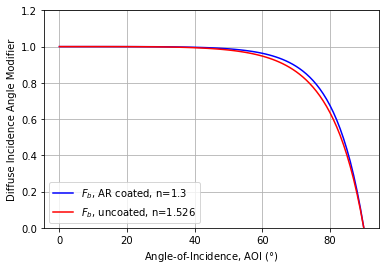

In [21]:
aoi = np.arange(0, 91)
iam_no_coating = physical(aoi, n=1.526, K=0)
iam_ar_coating = physical(aoi, n=1.3, K=0)

plt.plot(aoi, iam_ar_coating, c='b', label='$F_b$, AR coated, n=1.3')
plt.plot(aoi, iam_no_coating, c='r', label='$F_b$, uncoated, n=1.526')
plt.xlabel(r'Angle-of-Incidence, AOI $(\degree)$')
plt.ylabel('Diffuse Incidence Angle Modifier')
plt.legend()
plt.ylim([0, 1.2])
plt.grid()

## Diffuse sky, ground, and horizon IAM

Now that we have an AOI model, we use :py:func:`pvlib.iam.marion_diffuse`
to integrate it across solid angle and determine diffuse irradiance IAM.
Marion defines three types of diffuse irradiance:
sky, horizon, and ground-reflected.  The diffuse IAM value is evaluated
independently for each type.



In [22]:
tilts = np.arange(0, 91, 2.5)

# marion_diffuse calculates all three IAM values (sky, horizon, ground)
iam_no_coating = marion_diffuse('physical', tilts, n=1.526, K=0)
iam_ar_coating = marion_diffuse('physical', tilts, n=1.3, K=0)

First we recreate Figure 4 in [1]_, showing the dependence of the sky diffuse
incidence angle modifier on module tilt.



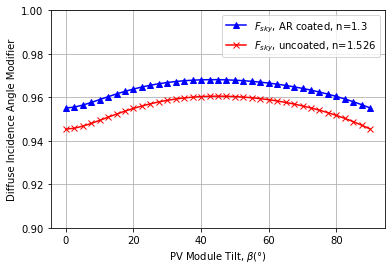

In [23]:
plt.plot(tilts, iam_ar_coating['sky'], c='b', marker='^',
         label='$F_{sky}$, AR coated, n=1.3')
plt.plot(tilts, iam_no_coating['sky'], c='r', marker='x',
         label='$F_{sky}$, uncoated, n=1.526')
plt.ylim([0.9, 1.0])
plt.xlabel(r'PV Module Tilt, $\beta (\degree)$')
plt.ylabel('Diffuse Incidence Angle Modifier')
plt.grid()
plt.legend()
plt.show()

Now we recreate Figure 5 in [1]_, showing the dependence of the diffuse iam
values for horizon and ground diffuse irradiance on module tilt.  Note that
:py:func:`pvlib.iam.marion_diffuse` defaults to using 1800 points for the
horizon case (instead of 180 like the others) to match [1]_.



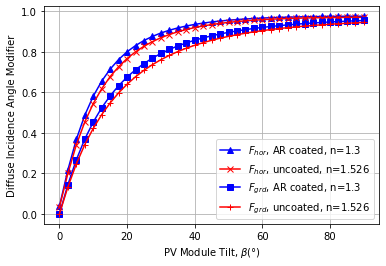

In [24]:
plt.plot(tilts, iam_ar_coating['horizon'], c='b', marker='^',
         label='$F_{hor}$, AR coated, n=1.3')
plt.plot(tilts, iam_no_coating['horizon'], c='r', marker='x',
         label='$F_{hor}$, uncoated, n=1.526')
plt.plot(tilts, iam_ar_coating['ground'], c='b', marker='s',
         label='$F_{grd}$, AR coated, n=1.3')
plt.plot(tilts, iam_no_coating['ground'], c='r', marker='+',
         label='$F_{grd}$, uncoated, n=1.526')
plt.xlabel(r'PV Module Tilt, $\beta (\degree)$')
plt.ylabel('Diffuse Incidence Angle Modifier')
plt.grid()
plt.legend()
plt.show()